X min: [ 1.  0. 60.  0.] X max: [ 10.   1. 200.  80.]
y min: [  53.95158598  223.90984975 9617.14106845] y max: [  153.66777963   713.76       66893.24      ]

Training with lr=0.001, hidden_size=1, epochs=5000
Epoch 0, Train Loss: 0.342534
Epoch 1000, Train Loss: 0.036781
Epoch 2000, Train Loss: 0.031770
Epoch 3000, Train Loss: 0.030905
Epoch 4000, Train Loss: 0.030776
Training Results: Loss=0.030736, Avg R²=0.527913
Test Results: Loss=0.018223, Avg R²=0.545016, R² per output=[np.float64(0.16402820195765522), np.float64(0.7534427951648819), np.float64(0.7175782835610891)]

Training with lr=0.001, hidden_size=1, epochs=10000
Epoch 0, Train Loss: 0.284078
Epoch 1000, Train Loss: 0.066985
Epoch 2000, Train Loss: 0.063552
Epoch 3000, Train Loss: 0.045445
Epoch 4000, Train Loss: 0.032543
Epoch 5000, Train Loss: 0.030760
Epoch 6000, Train Loss: 0.030568
Epoch 7000, Train Loss: 0.030528
Epoch 8000, Train Loss: 0.030513
Epoch 9000, Train Loss: 0.030503
Training Results: Loss=0.030495, Avg R²=

C:\Users\lionk\anaconda3\envs\MLProject\Lib\site-packages\numpy\_core\_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\lionk\AppData\Local\Temp\ipykernel_15960\204176920.py:53: RuntimeWarning: overflow encountered in square
  loss = np.mean((target - output) ** 2)
C:\Users\lionk\AppData\Local\Temp\ipykernel_15960\204176920.py:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\lionk\anaconda3\envs\MLProject\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\lionk\AppData\Local\Temp\ipykernel_15960\204176920.py:36: RuntimeWarning: invalid value encountered in multiply
  hidden_grad = hidden_error * self.d_sigmoid(hidden_output)
C:\Users\lionk\AppData\Local\Temp\ipykernel_15960\204176920.py:40: RuntimeWarning: invalid value encountered in add
  self.b_hidden

Epoch 1000, Train Loss: nan
Early stopping at epoch 1000
Training Results: Loss=1.335259, Avg R²=-20.182807
Test Results: Loss=1.312995, Avg R²=-40.006991, R² per output=[np.float64(-28.37445469133297), np.float64(-3.526247945494899), np.float64(-88.12027185144356)]

Training with lr=0.05, hidden_size=1, epochs=10000
Epoch 0, Train Loss: 0.329023
Epoch 1000, Train Loss: nan
Early stopping at epoch 1000
Training Results: Loss=2.969865, Avg R²=-41.873633
Test Results: Loss=3.201456, Avg R²=-69.441696, R² per output=[np.float64(-57.484702428428136), np.float64(-107.4796723024375), np.float64(-43.36071436118324)]

Training with lr=0.05, hidden_size=1, epochs=20000
Epoch 0, Train Loss: 0.411882
Epoch 1000, Train Loss: nan
Early stopping at epoch 1000
Training Results: Loss=3.153419, Avg R²=-44.698401
Test Results: Loss=3.356657, Avg R²=-73.886311, R² per output=[np.float64(-62.89377088361356), np.float64(-108.4910716563789), np.float64(-50.27409176463639)]

Training with lr=0.05, hidden_siz

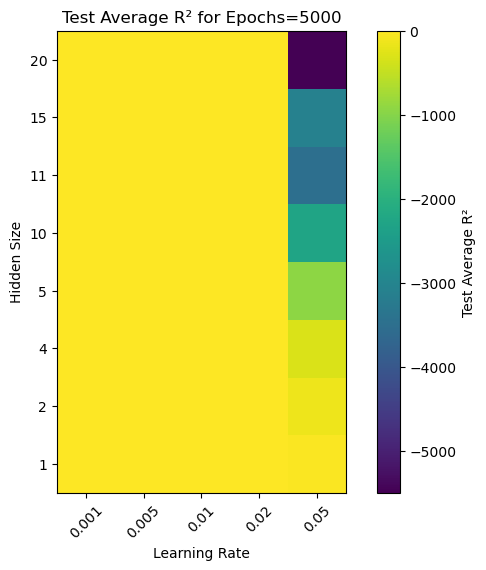

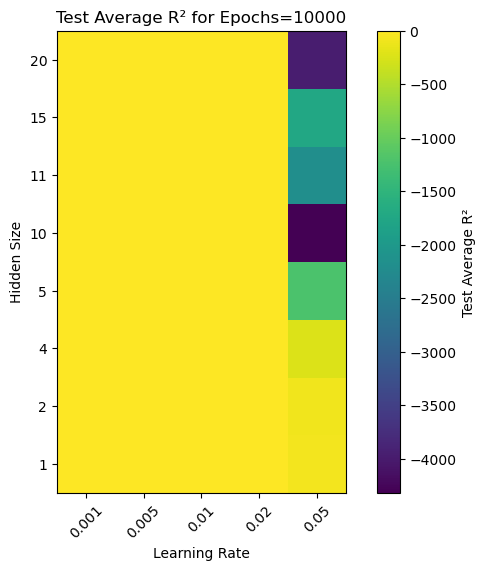

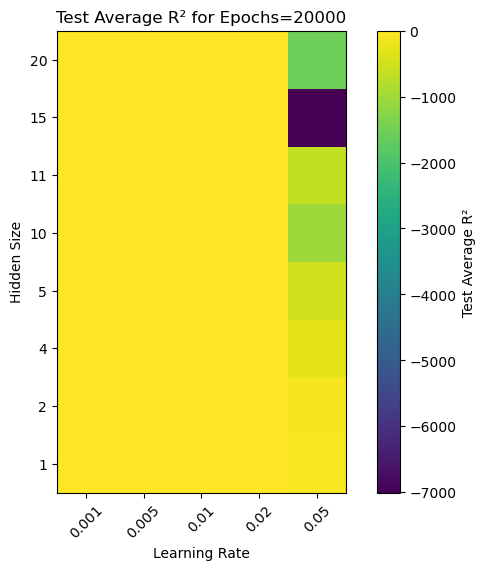

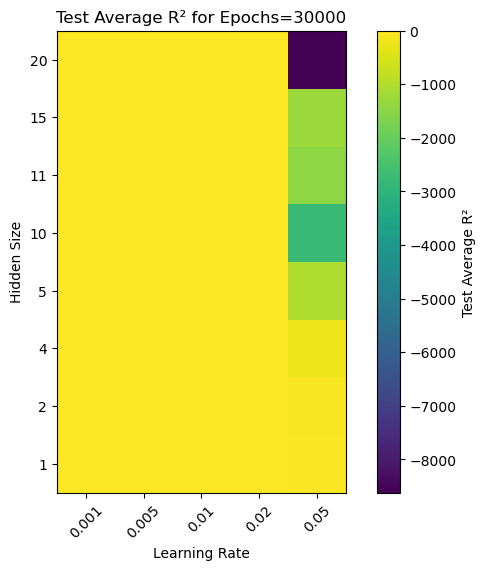

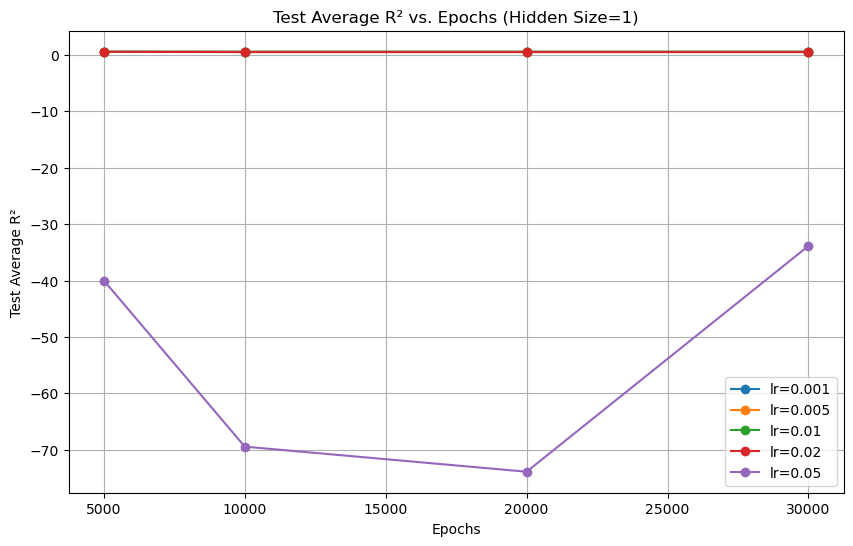

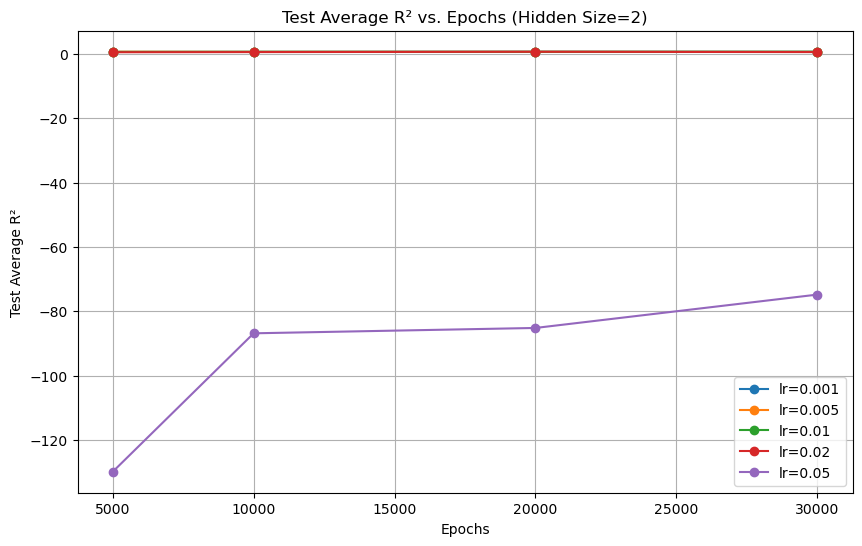

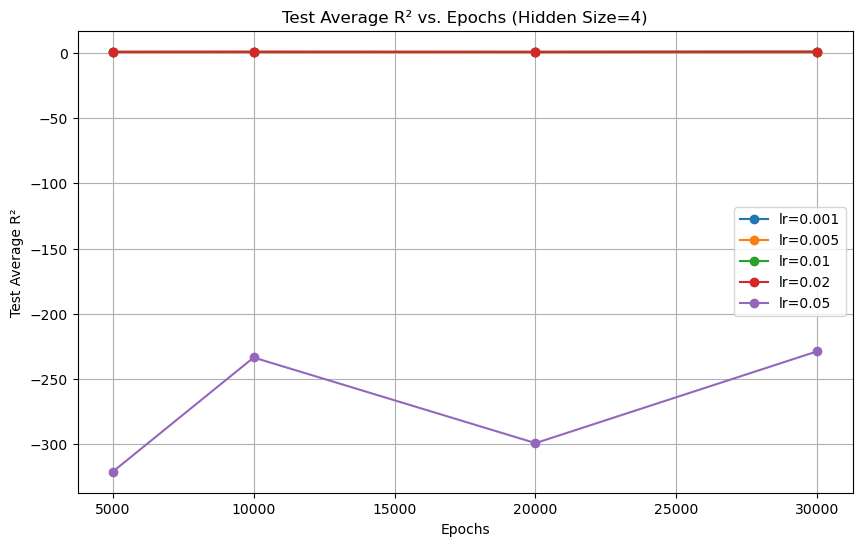

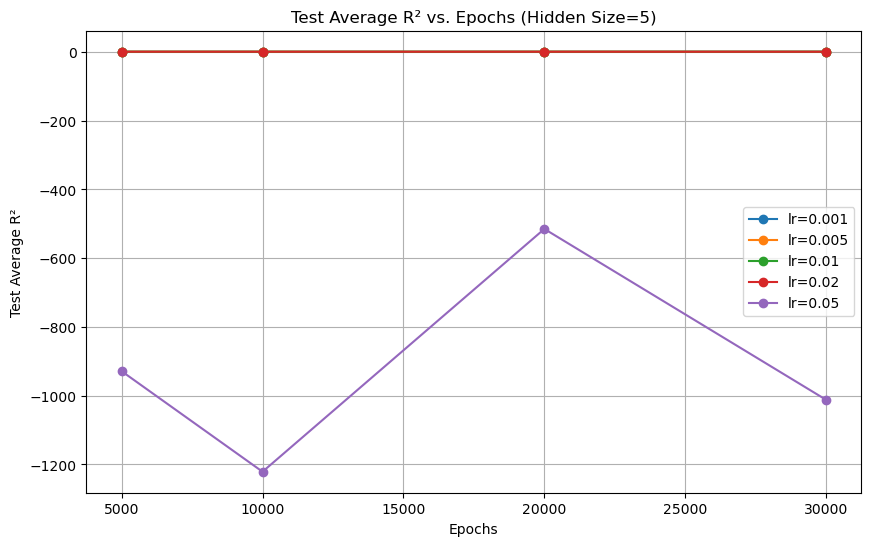

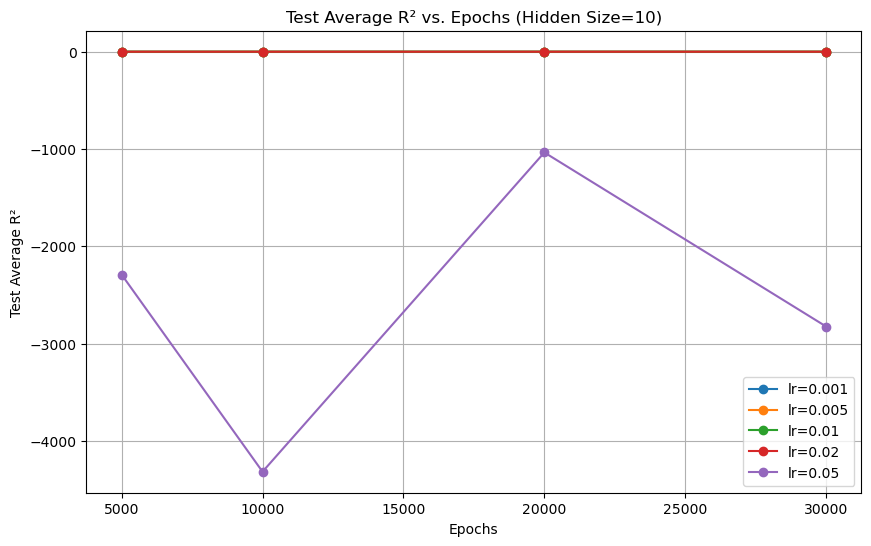

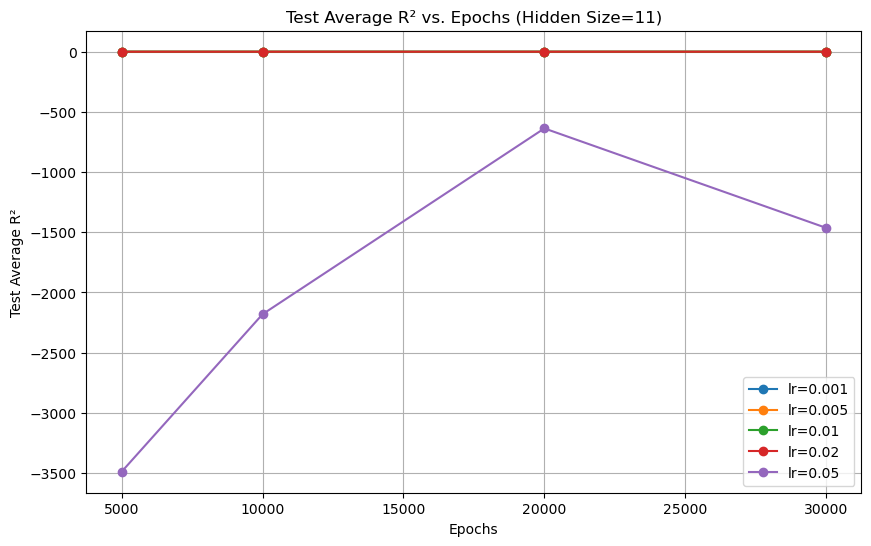

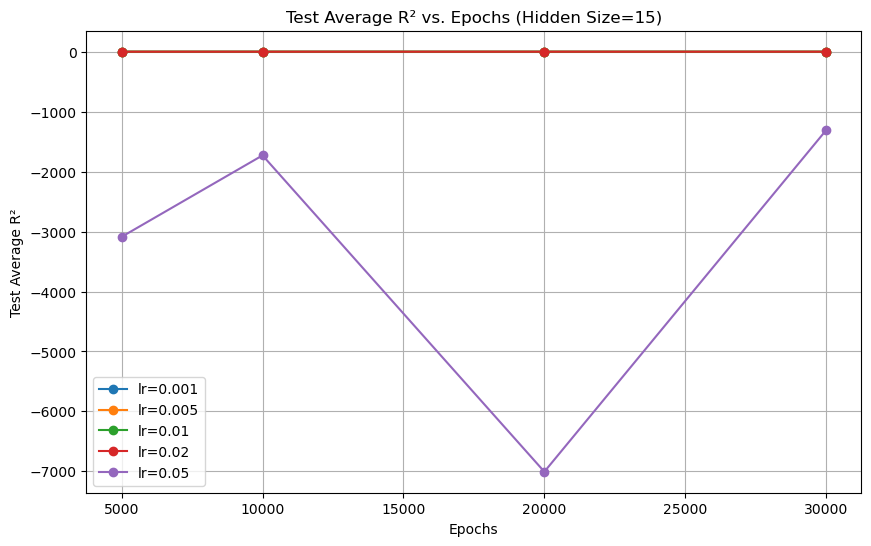

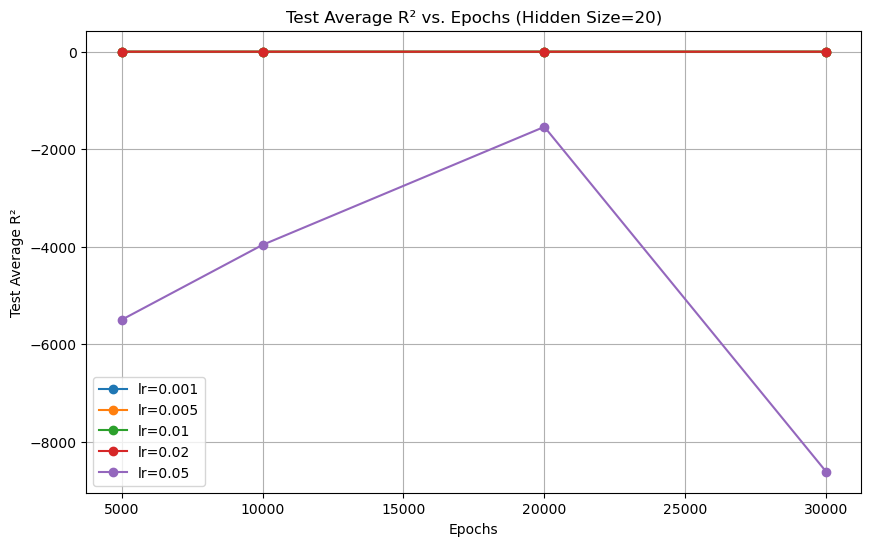


Plotting predictions for the best model


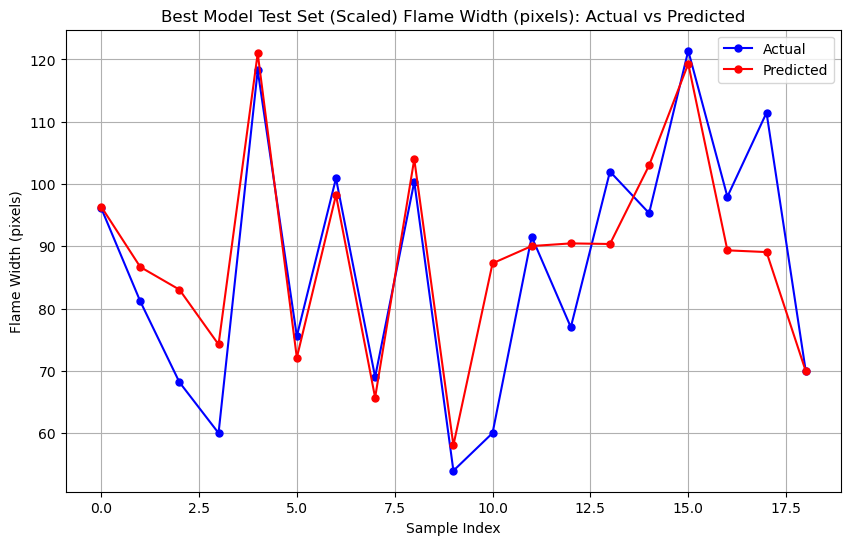

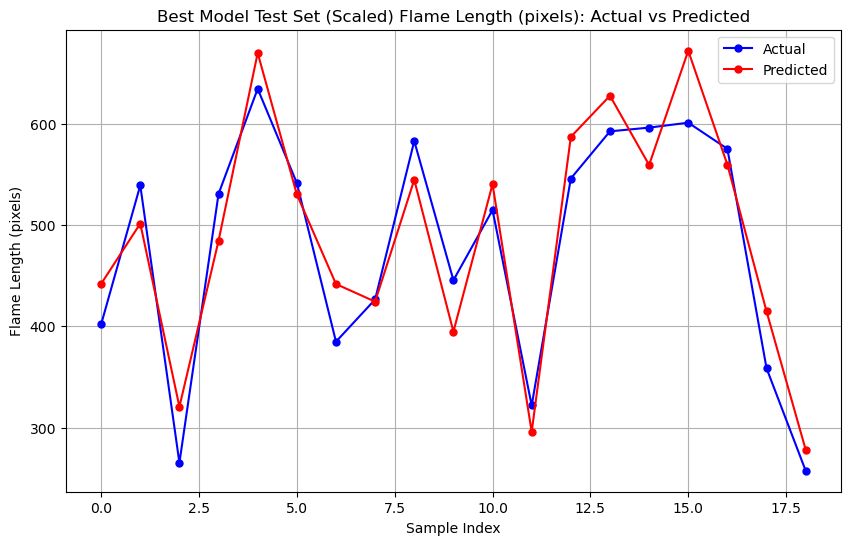

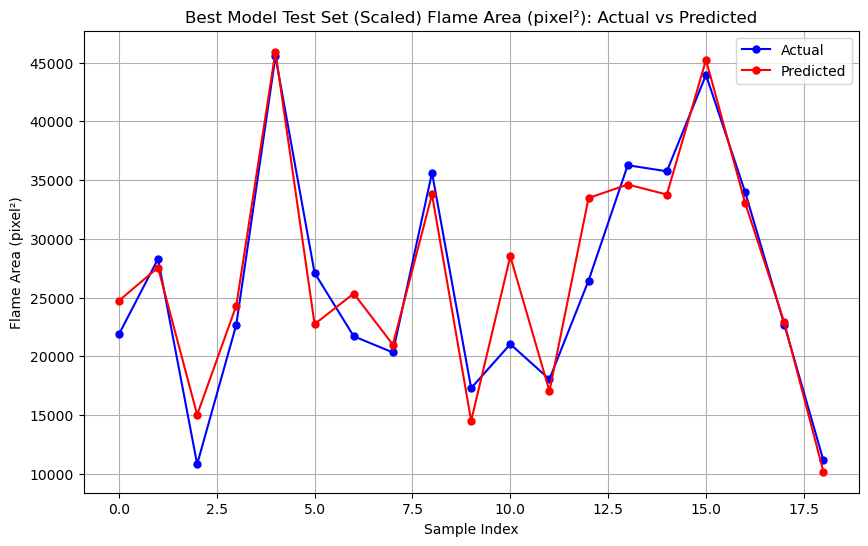

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Xavier initialization
        self.W_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0 / (self.input_size + self.hidden_size))
        self.b_input_hidden = np.zeros((1, self.hidden_size))
        self.W_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0 / (self.hidden_size + self.output_size))
        self.b_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def d_sigmoid(self, x):
        return x * (1 - x)

    def forward(self, input_data):
        hidden_layer_input = np.dot(input_data, self.W_input_hidden) + self.b_input_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.W_hidden_output) + self.b_hidden_output
        output = output_layer_input  # Linear output for regression
        return hidden_layer_output, output

    def backward(self, input_data, target, hidden_output, output, lr):
        output_error = target - output
        output_grad = output_error  # No sigmoid derivative for linear output
        hidden_error = np.dot(output_grad, self.W_hidden_output.T)
        hidden_grad = hidden_error * self.d_sigmoid(hidden_output)

        # Update weights and biases
        self.W_hidden_output += np.dot(hidden_output.T, output_grad) * lr
        self.b_hidden_output += np.sum(output_grad, axis=0, keepdims=True) * lr
        self.W_input_hidden += np.dot(input_data.T, hidden_grad) * lr
        self.b_input_hidden += np.sum(hidden_grad, axis=0, keepdims=True) * lr

    def train(self, input_data, target, epochs=20000, lr=0.01, early_stopping_patience=1000):
        best_loss = float('inf')
        patience_counter = 0
        best_weights = None
        best_output = None

        for epoch in range(epochs):
            hidden_output, output = self.forward(input_data)
            self.backward(input_data, target, hidden_output, output, lr)
            loss = np.mean((target - output) ** 2)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Train Loss: {loss:.6f}")

            # Early stopping
            if loss < best_loss:
                best_loss = loss
                best_weights = {
                    'W_input_hidden': self.W_input_hidden.copy(),
                    'b_input_hidden': self.b_input_hidden.copy(),
                    'W_hidden_output': self.W_hidden_output.copy(),
                    'b_hidden_output': self.b_hidden_output.copy()
                }
                best_output = output.copy()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print(f"Early stopping at epoch {epoch}")
                    self.W_input_hidden = best_weights['W_input_hidden']
                    self.b_input_hidden = best_weights['b_input_hidden']
                    self.W_hidden_output = best_weights['W_hidden_output']
                    self.b_hidden_output = best_weights['b_hidden_output']
                    return best_output
        return best_output

    def evaluate(self, input_data, target):
        _, output = self.forward(input_data)
        loss = np.mean((target - output) ** 2)

        # Aggregated R²
        sum_os_res = np.sum((target - output) ** 2)
        target_mean = np.mean(target, axis=0)
        sum_os_tot = np.sum((target - target_mean) ** 2)
        r2_aggregated = 1 - (sum_os_res / (sum_os_tot + 1e-8))

        # Per-output R²
        r2_per_output = []
        for i in range(target.shape[1]):
            ss_res = np.sum((target[:, i] - output[:, i]) ** 2)
            ss_tot = np.sum((target[:, i] - np.mean(target[:, i])) ** 2)
            r2_i = 1 - (ss_res / (ss_tot + 1e-8))
            r2_per_output.append(r2_i)

        return loss, r2_aggregated, r2_per_output, output

def plot_predictions(y_true, y_pred, title_prefix="", scaler_y=None):
    output_names = ['Flame Width (pixels)', 'Flame Length (pixels)', 'Flame Area (pixel²)']
    for i in range(y_true.shape[1]):
        plt.figure(figsize=(10, 6))
        if scaler_y is not None:
            y_true_plot = scaler_y.inverse_transform(y_true)[:, i]
            y_pred_plot = scaler_y.inverse_transform(y_pred)[:, i]
        else:
            y_true_plot = y_true[:, i]
            y_pred_plot = y_pred[:, i]
        plt.plot(y_true_plot, 'bo-', label='Actual', markersize=5)
        plt.plot(y_pred_plot, 'ro-', label='Predicted', markersize=5)
        plt.title(f"{title_prefix} {output_names[i]}: Actual vs Predicted")
        plt.xlabel('Sample Index')
        plt.ylabel(output_names[i])
        plt.legend()
        plt.grid(True)
        plt.show()

def plot_grid_search_results(results, lr_values, hidden_size_values, epochs_values):
    # Plot heatmap for each epoch value
    for epochs in epochs_values:
        plt.figure(figsize=(8, 6))
        r2_matrix = np.zeros((len(hidden_size_values), len(lr_values)))
        for i, hidden_size in enumerate(hidden_size_values):
            for j, lr in enumerate(lr_values):
                for result in results:
                    if result['epochs'] == epochs and result['hidden_size'] == hidden_size and result['lr'] == lr:
                        r2_matrix[i, j] = result['test_avg_r2']
        plt.imshow(r2_matrix, cmap='viridis', origin='lower')
        plt.colorbar(label='Test Average R²')
        plt.xticks(np.arange(len(lr_values)), lr_values, rotation=45)
        plt.yticks(np.arange(len(hidden_size_values)), hidden_size_values)
        plt.xlabel('Learning Rate')
        plt.ylabel('Hidden Size')
        plt.title(f'Test Average R² for Epochs={epochs}')
        plt.show()

    # Plot R² vs. epochs for each lr and hidden_size
    for hidden_size in hidden_size_values:
        plt.figure(figsize=(10, 6))
        for lr in lr_values:
            r2_values = []
            for epochs in epochs_values:
                for result in results:
                    if result['hidden_size'] == hidden_size and result['lr'] == lr and result['epochs'] == epochs:
                        r2_values.append(result['test_avg_r2'])
            plt.plot(epochs_values, r2_values, marker='o', label=f'lr={lr}')
        plt.title(f'Test Average R² vs. Epochs (Hidden Size={hidden_size})')
        plt.xlabel('Epochs')
        plt.ylabel('Test Average R²')
        plt.legend()
        plt.grid(True)
        plt.show()

# Load the Excel file
input_size = 4
output_size = 3

df = pd.read_excel("Parameters_AveragedLengthWidthArea_Modified.xlsx")
X = df[['Power', 'Gas', 'Tangential', 'Axial']].to_numpy()
y = df[['Flame Width AveragePixel', 'Flame Length Average Pixel', 'Flame Area Average Pixel^2']].to_numpy()


# Print data ranges for debugging
print("X min:", X.min(axis=0), "X max:", X.max(axis=0))
print("y min:", y.min(axis=0), "y max:", y.max(axis=0))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Grid search parameters
lr_values = [0.001, 0.005, 0.01, 0.02, 0.05]
hidden_size_values = [1, 2, 4, 5, 10, 11, 15, 20]
epochs_values = [5000, 10000, 20000, 30000]

results = []
best_r2 = -float('inf')
best_params = None
best_model = None
best_test_pred = None

# Perform grid search
for lr in lr_values:
    for hidden_size in hidden_size_values:
        for epochs in epochs_values:
            print(f"\nTraining with lr={lr}, hidden_size={hidden_size}, epochs={epochs}")
            model = MLP(input_size, hidden_size, output_size)
            train_output = model.train(X_train_scaled, y_train_scaled, epochs=epochs, lr=lr, early_stopping_patience=1000)
            train_loss, train_r2, train_r2_per_output, train_pred = model.evaluate(X_train_scaled, y_train_scaled)
            test_loss, test_r2, test_r2_per_output, test_pred = model.evaluate(X_test_scaled, y_test_scaled)

            print(f"Training Results: Loss={train_loss:.6f}, Avg R²={np.mean(train_r2_per_output):.6f}")
            print(f"Test Results: Loss={test_loss:.6f}, Avg R²={np.mean(test_r2_per_output):.6f}, R² per output={test_r2_per_output}")

            results.append({
                'lr': lr,
                'hidden_size': hidden_size,
                'epochs': epochs,
                'train_loss': train_loss,
                'train_avg_r2': np.mean(train_r2_per_output),
                'test_loss': test_loss,
                'test_avg_r2': np.mean(test_r2_per_output),
                'test_r2_per_output': test_r2_per_output
            })

            if np.mean(test_r2_per_output) > best_r2:
                best_r2 = np.mean(test_r2_per_output)
                best_params = {'lr': lr, 'hidden_size': hidden_size, 'epochs': epochs}
                best_model = model
                best_test_pred = test_pred

# Print best parameters
print(f"\nBest Parameters: lr={best_params['lr']}, hidden_size={best_params['hidden_size']}, epochs={best_params['epochs']}")
print(f"Best Test Average R²: {best_r2:.6f}")

# Plot grid search results
plot_grid_search_results(results, lr_values, hidden_size_values, epochs_values)

# Plot predictions for the best model (original scale)
print("\nPlotting predictions for the best model")
plot_predictions(y_test_scaled, best_test_pred, title_prefix="Best Model Test Set (Scaled)", scaler_y=scaler_y)